# E5 Advanced geospatial plotting

In [2]:
import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt

In [4]:
import keplergl
keplergl.__version__


'0.3.2'

In [6]:
df = pd.read_csv('NewYork_data.csv', index_col = 0)

In [8]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp,_merge,value,bike_rides_daily_x,merge_flag,bike_rides_daily_y
0,BC3FFFD55572712C,docked_bike,2021-06-01 20:38:35,2021-06-01 20:42:31,11 St & Washington St,HB502,Columbus Park - Clinton St & 9 St,HB501,40.749984,-74.027150,40.748161,-74.032453,member,2021-06-01,NaN,left_only,1,2024,both,2024
1,76244D3FB84245AA,docked_bike,2021-06-01 16:42:40,2021-06-01 16:46:28,8 St & Washington St,HB603,Columbus Park - Clinton St & 9 St,HB501,40.745983,-74.028199,40.748161,-74.032453,member,2021-06-01,NaN,left_only,1,2024,both,2024
2,A284AABB2C747554,electric_bike,2021-06-01 17:06:54,2021-06-01 17:19:07,11 St & Washington St,HB502,Hoboken Terminal - River St & Hudson Pl,HB102,40.749984,-74.027150,40.736068,-74.029127,casual,2021-06-01,NaN,left_only,1,2024,both,2024
3,88CCB07E62CA4AFA,docked_bike,2021-06-01 17:58:56,2021-06-01 18:06:52,11 St & Washington St,HB502,Hoboken Terminal - River St & Hudson Pl,HB102,40.749984,-74.027150,40.736068,-74.029127,member,2021-06-01,NaN,left_only,1,2024,both,2024
4,42B65D476BD5FE41,electric_bike,2021-06-01 11:22:54,2021-06-01 11:28:52,11 St & Washington St,HB502,Hoboken Terminal - River St & Hudson Pl,HB102,40.749984,-74.027150,40.736068,-74.029127,member,2021-06-01,NaN,left_only,1,2024,both,2024


In [10]:
df.shape

(1388898, 20)

## Data Preprocessing

In [13]:
# Create a value column and group by start and end station 

df['value'] = 1
df_group = df.groupby(['start_station_name', 'end_station_name'])['value'].count().reset_index()

In [15]:
df_group

,start_station_name,end_station_name,value
0,11 St & Washington St,10 Ave & W 14 St,1
1,11 St & Washington St,11 St & Washington St,2571
2,11 St & Washington St,12 Ave & W 40 St,2
3,11 St & Washington St,12 St & Sinatra Dr N,348
4,11 St & Washington St,14 St Ferry - 14 St & Shipyard Ln,659
...,...,...,...
7530,York St & Marin Blvd,Van Vorst Park,14
7531,York St & Marin Blvd,Warren St,33
7532,York St & Marin Blvd,Washington St,10
7533,York St & Marin Blvd,Willow Ave & 12 St,1


In [17]:
print(df_group['value'].sum())
print(df.shape)

1382728
(1388898, 20)


In [19]:
df_group['value'].describe()

count     7535.000000
mean       183.507366
std        465.212336
min          1.000000
25%          8.000000
50%         37.000000
75%        159.000000
max      10435.000000
Name: value, dtype: float64

### Some exploratory analysis into the trips

NameError: name 'plot' is not defined

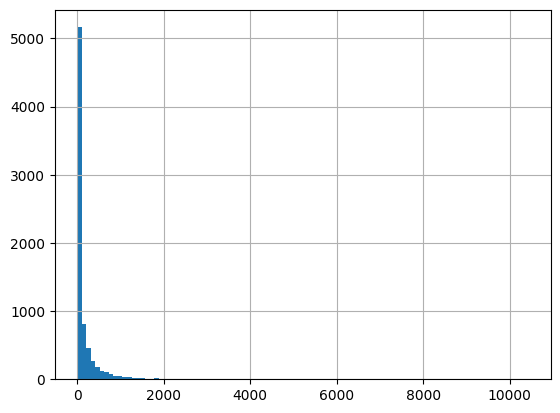

In [22]:
df_group['value'].hist(bins = 100)
plot.show()

[]

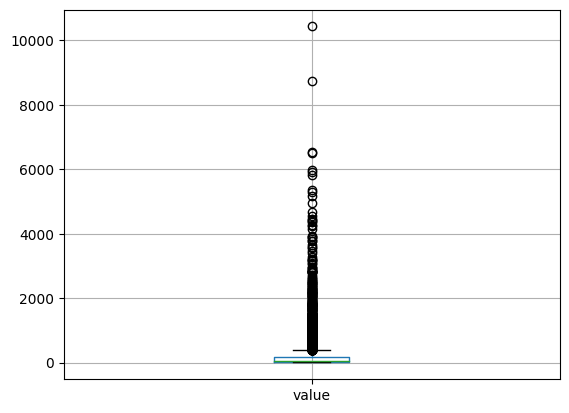

In [24]:
b_plot = df_group.boxplot(column = 'value') 
b_plot.plot()

In [26]:
df_group['value'].sort_index().value_counts()

1       792
2       298
3       210
4       153
5       124
       ... 
1211      1
756       1
2298      1
724       1
969       1
Name: value, Length: 1014, dtype: int64

In [28]:
df_group.to_csv('df_groupby_final.csv')

In [30]:
df_group.head()

,start_station_name,end_station_name,value
0,11 St & Washington St,10 Ave & W 14 St,1
1,11 St & Washington St,11 St & Washington St,2571
2,11 St & Washington St,12 Ave & W 40 St,2
3,11 St & Washington St,12 St & Sinatra Dr N,348
4,11 St & Washington St,14 St Ferry - 14 St & Shipyard Ln,659


In [32]:
df = df[['start_station_name','bike_rides_daily_x', 'end_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng']]

In [34]:
df

,start_station_name,bike_rides_daily_x,end_station_name,start_lat,start_lng,end_lat,end_lng
0,11 St & Washington St,2024,Columbus Park - Clinton St & 9 St,40.749984,-74.027150,40.748161,-74.032453
1,8 St & Washington St,2024,Columbus Park - Clinton St & 9 St,40.745983,-74.028199,40.748161,-74.032453
2,11 St & Washington St,2024,Hoboken Terminal - River St & Hudson Pl,40.749984,-74.027150,40.736068,-74.029127
3,11 St & Washington St,2024,Hoboken Terminal - River St & Hudson Pl,40.749984,-74.027150,40.736068,-74.029127
4,11 St & Washington St,2024,Hoboken Terminal - River St & Hudson Pl,40.749984,-74.027150,40.736068,-74.029127
...,...,...,...,...,...,...,...
1388893,Harborside,1751,Jersey & 3rd,40.719252,-74.034234,40.723332,-74.045953
1388894,Grove St PATH,1751,Jersey & 3rd,40.719586,-74.043117,40.723332,-74.045953
1388895,Grove St PATH,1751,Jersey & 3rd,40.719586,-74.043117,40.723332,-74.045953
1388896,Jersey & 6th St,1751,Jersey & 3rd,40.725289,-74.045572,40.723332,-74.045953


In [36]:
import gc # this is garbage collector - speeds up performance
gc.collect()

9298

In [38]:
df.to_csv('df_locations_for_map.csv')

In [39]:
# Create KeplerGl instance

m = KeplerGl(height = 500, data={"data_1": df})


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


/opt/anaconda3/envs/venv2.5/lib/python3.9/site-packages/jupyter_client/session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [44]:
new_york_view = {
"version": "v1",
"config": {
"mapState": {
"latitude": 40.7128,
"longitude": -74.0060,
"zoom": 10,

    }
}
}
m.config = new_york_view

In [46]:
config = m.config

In [48]:
# Save Map
m.save_to_html(file_name='kepler_map.html', read_only = False, config = config)

Map saved to kepler_map.html!


In [50]:
import json
with open("config.json", "w") as outfile:
    json.dump(config, outfile)